In [10]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing phase:

In [11]:
df= pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df_for_procss=df[['Survived','Pclass','Name','Sex','Age','SibSp','Parch','Fare','Embarked']]
df_for_procss[df_for_procss.isnull().any(axis=1)]
df_for_procss.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [18]:
df_copy=df.copy()
del df_copy['Cabin']
df_copy.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [19]:
df_copy.Age=df_copy.Age.fillna(df.Age.mean())
df_copy.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [20]:
df_copy.dropna(axis=0, inplace=True)
df_copy.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Visualization phase:

C:\Users\Manel-PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


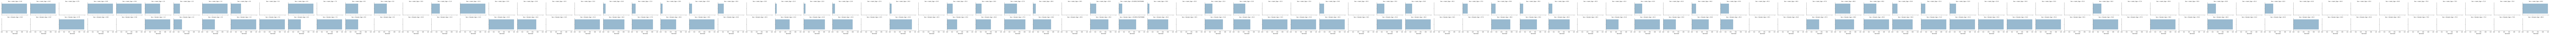

In [24]:
grid = sns.FacetGrid(df_copy, row="Sex", col="Age", height=2.2, aspect=1.6)
grid.map(sns.barplot, "Survived", alpha=.5, ci=None)
grid.add_legend()

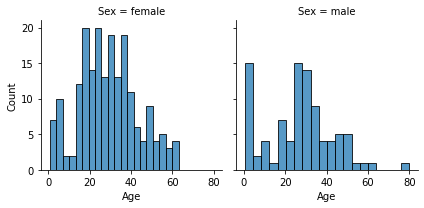

In [22]:
df_mask1=df['Survived']==1
filtered_df_copy_surv1 = df[df_mask1]
filtered_df_copy_surv1.head(20)
g_surv1=sns.FacetGrid(filtered_df_copy_surv1,col='Sex')
g_surv1.map(sns.histplot,'Age',bins=20)

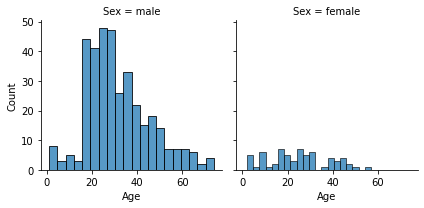

In [25]:
df_mask0=df['Survived']==0
filtered_df_copy_surv0 = df[df_mask0]
filtered_df_copy_surv0.head(20)
g_surv0=sns.FacetGrid(filtered_df_copy_surv0,col='Sex')
g_surv0.map(sns.histplot,'Age',bins=20)

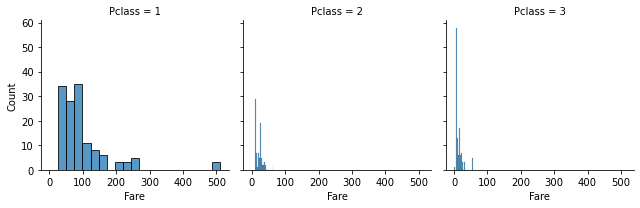

In [26]:
g_surv1_cl=sns.FacetGrid(filtered_df_copy_surv1,col='Pclass')
g_surv1_cl.map(sns.histplot,'Fare',bins=20)

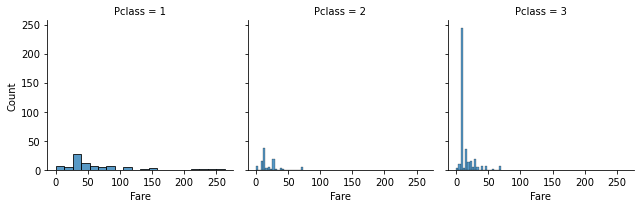

In [27]:
g_surv0_cl=sns.FacetGrid(filtered_df_copy_surv0,col='Pclass')
g_surv0_cl.map(sns.histplot,'Fare',bins=20)

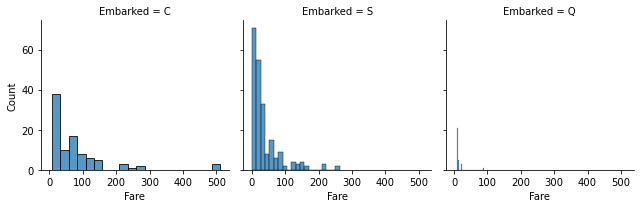

In [28]:
g_surv1_Em=sns.FacetGrid(filtered_df_copy_surv1,col='Embarked')
g_surv1_Em.map(sns.histplot,'Fare',bins=20)

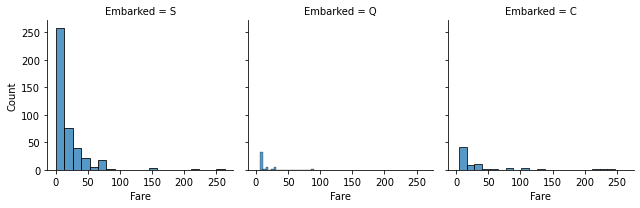

In [29]:
g_surv0_Em=sns.FacetGrid(filtered_df_copy_surv0,col='Embarked')
g_surv0_Em.map(sns.histplot,'Fare',bins=20)

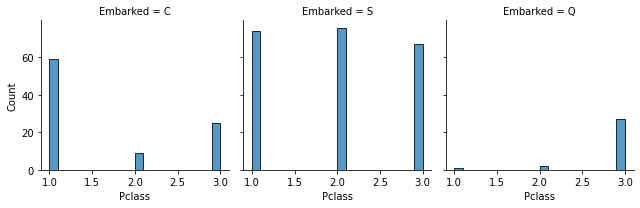

In [30]:
g_surv1_EmPc=sns.FacetGrid(filtered_df_copy_surv1,col='Embarked')
g_surv1_EmPc.map(sns.histplot,'Pclass',bins=20)

In [31]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

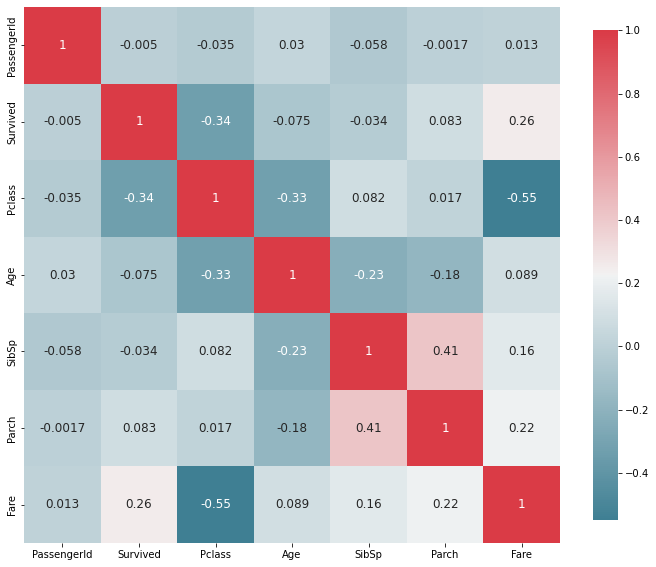

In [32]:
plot_correlation_map(df_copy)


Tt's a square symetric matrix that represents and summarizes the correlation between each two features. Indeed, we can clearly see the value "1" along the diagonal of the matrix. Generally, the value of the correlation is a positive value, but we notice here that we have negative values, and the more the absolute value of the correlation increases, the more the color tends towards a darker degree. We also notice that we have two colors with different degrees, red and blue.  The values around the "zero", presented with a light blue, present a non-correlation between the features and it is the case of the correlation of any feature with the "PassengerId". Another important note is that the olor shows how one feature varies with respect to the variation of another. In fact, the more the value of the correlation increases positively, the more the color tends towards dark red and the more the two studied features vary proportionally (e.g. diagonal).
On the other hand, the more the value of the correlation increases negatively, the more the color tends towards dark blue and the more the two studied features are inversely proportionals (e.g. Pclass and Fare, Pclass increases => the Fare decrease, which makes sense).
We can note here that "Ticket", "Name" and "Sex" are note taken into account here as they are not values.

In [33]:
df[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [34]:
df_copy.drop(["PassengerId","Ticket"],axis=1, inplace = True) 
df_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [35]:
df_copy['Title']=''
df_copy['Title'] = df_copy['Name'].apply(lambda x : ((x.split(',')[1]).split('.')[0]).strip())
df_copy.drop(["Name"],axis=1, inplace = True) 
df_copy.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.000000,1,0,7.2500,S,Mr
1,1,1,female,38.000000,1,0,71.2833,C,Mrs
2,1,3,female,26.000000,0,0,7.9250,S,Miss
3,1,1,female,35.000000,1,0,53.1000,S,Mrs
4,0,3,male,35.000000,0,0,8.0500,S,Mr
5,0,3,male,29.699118,0,0,8.4583,Q,Mr
6,0,1,male,54.000000,0,0,51.8625,S,Mr
7,0,3,male,2.000000,3,1,21.0750,S,Master
8,1,3,female,27.000000,0,2,11.1333,S,Mrs
9,1,2,female,14.000000,1,0,30.0708,C,Mrs


In [67]:
df_copy2=df_copy.copy()
df_copy3=df_copy2.copy()
cleanup_Sex={"Sex":{"female":1, "male": 0}}  
df_copy2.replace(cleanup_Sex, inplace=True)
df_copy2[["Title", "Sex"]].groupby(["Title"], as_index=True).sum()
df_copy2.head()

df_copy3['Female']=''
df_copy3['Female'] = df_copy3['Sex'].map({'female': 1, 'male': 0})
df_copy3['Male']=''
df_copy3['Male'] = df_copy3['Sex'].map({'male': 1, 'female': 0})
df_copy3.head()
df_copy3[["Title", "Female","Male"]].groupby(["Title"], as_index=True).sum()



,Female,Male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,181,0


<AxesSubplot:xlabel='Age', ylabel='Fare'>

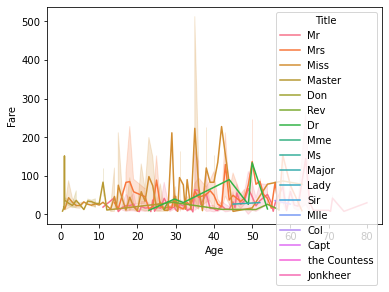

In [69]:
sns.lineplot(data=df_copy3, x="Age", y="Fare", hue="Title")

In [70]:
df_copy3[["Title", "Fare"]].groupby(["Title"], as_index=True).mean()


,Fare
Title,
Capt,71.000000
Col,31.025000
Don,27.720800
Dr,49.168457
Jonkheer,0.000000
Lady,39.600000
Major,28.525000
Master,34.703125
Miss,43.597861


In [71]:
df_copy3[["Title", "Age"]].groupby(["Title"], as_index=True).mean()


,Age
Title,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,40.242731
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,7.086662
Miss,23.260598


In [81]:
Title_Dictionary = {"Capt":"Officer", "Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty","Don":"Royalty","Sir" :"Royalty","Lady" :"Royalty",
"the Countess": "Royalty","Dona":"Royalty","Mme":"Miss","Mlle":"Miss","Miss" :"Miss","Ms":"Mrs","Mr" :"Mrs","Mrs" :"Mrs","Master" :"Master"}

In [85]:
df_copy3['Title'] = df_copy3['Title'].replace(Title_Dictionary)
df_copy3[["Title", "Female","Male"]].groupby(["Title"], as_index=True).sum()


,Female,Male
Title,,
Master,0,40
Miss,184,0
Mrs,125,517
Officer,1,17
Royalty,2,3


In [86]:
df_copy3[["Title", "Fare"]].groupby(["Title"], as_index=True).mean()

,Fare
Title,
Master,34.703125
Miss,43.909332
Mrs,28.366983
Officer,35.786344
Royalty,42.150000


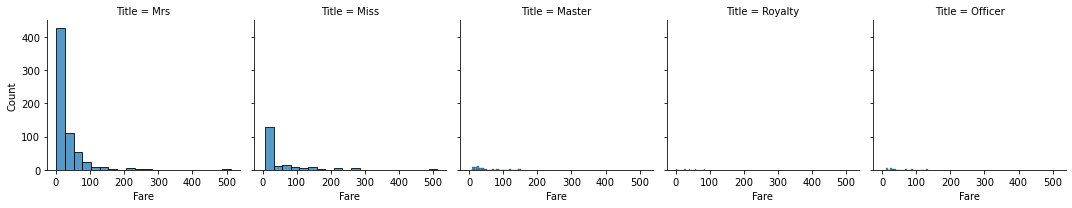

In [87]:
g_surv3_cl=sns.FacetGrid(df_copy3,col='Title')
g_surv3_cl.map(sns.histplot,'Fare',bins=20)

In [88]:
df_copy3[["Title", "Age"]].groupby(["Title"], as_index=True).mean()

,Age
Title,
Master,7.086662
Miss,23.272653
Mrs,32.343583
Officer,45.761062
Royalty,41.600000


In [89]:
df_copy3['FamilySize']=''
df_copy3['FamilySize'] = df_copy3['SibSp'] + df_copy3['Parch'] + 1
df_copy3.head(20)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Female,Male,FamilySize
0,0,3,male,22.000000,1,0,7.2500,S,Mrs,0,1,2
1,1,1,female,38.000000,1,0,71.2833,C,Mrs,1,0,2
2,1,3,female,26.000000,0,0,7.9250,S,Miss,1,0,1
3,1,1,female,35.000000,1,0,53.1000,S,Mrs,1,0,2
4,0,3,male,35.000000,0,0,8.0500,S,Mrs,0,1,1
5,0,3,male,29.699118,0,0,8.4583,Q,Mrs,0,1,1
6,0,1,male,54.000000,0,0,51.8625,S,Mrs,0,1,1
7,0,3,male,2.000000,3,1,21.0750,S,Master,0,1,5
8,1,3,female,27.000000,0,2,11.1333,S,Mrs,1,0,3
9,1,2,female,14.000000,1,0,30.0708,C,Mrs,1,0,2


In [90]:
df_copy3[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=True).mean()

,Survived
FamilySize,
1,0.300935
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [91]:
df_copy3[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=True).sum()

,Survived
FamilySize,
1,161
2,89
3,59
4,21
5,3
6,3
7,4
8,0
11,0


We can note that the passengers  coming from families with big size did not survive, which makes sense, because this type of passengers belongs to class B, and vice versa.

In [98]:
df_maskM=df_copy3['Title']=="Master"
filtered_df_copy_Master = df_copy3[df_maskM]
filtered_df_copy_Master["Age"].mean()


7.08666176470588

# Decision Trees & Random Forests

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [65]:
df_copy3.replace({'Sex':{'male': 1,'female':0}},inplace=True)
x = df_copy3[['Pclass', 'Fare','FamilySize','Age','Sex']]
y = df_copy3['Survived']


In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

In [78]:
from sklearn import tree   
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [80]:
tree_DTC = tree.DecisionTreeClassifier()  
tree_DTC.fit(x_train, y_train)   #fitting our model
y_pred_DT=tree_DTC.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred_DT)))


score:0.7533632286995515


In [105]:
tree_DTC_par = tree.DecisionTreeClassifier(criterion="gini", splitter='random',max_leaf_nodes=10,min_samples_leaf=5, max_depth=5)  
tree_DTC_par.fit(x_train, y_train)   #fitting our model
y_pred_DT_par=tree_DTC_par.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred_DT_par)))


score:0.7802690582959642


Comparing to the previous model, in which all the parameters are set as default (criterion="gini", splitter='best',max_leaf_nodes=None,min_samples_leaf=1, max_depth=None), we have changed the  splitter, max_leaf_nodes, min_samples_leaf and the max_depth parameters. However, the accuracy has not undergone significant variation

In [104]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [82]:
# Generate an image of the tree
from io import StringIO
from IPython.display import Image, display
import pydotplus

In [96]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'


In [97]:
out = StringIO()
tree.export_graphviz(tree_DTC, out_file=out)

img = pydotplus.graph_from_dot_data(out.getvalue())
img.write_png('Survived_prediction.png')

InvocationException: GraphViz's executables not found

In [99]:
#from sklearn.tree import export_graphviz
import graphviz
dot_data=tree.export_graphviz(tree_DTC,out_file=None,filled=True)
graph=graphviz.Source(dot_data,format="png")
graph.render("decision_tree_graphivz")
#'decision_tree_graphivz.png'
#graph


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [70]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier

In [71]:
clf_10=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf_10.fit(x_train, y_train)  #Training our model
y_pred_RF_10=clf_10.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_RF_10))  #Measuring the accuracy of our model


Accuracy: 0.7892376681614349


In [72]:
clf_20=RandomForestClassifier(n_estimators=20)  #Creating a random forest with 100 decision trees
clf_20.fit(x_train, y_train)  #Training our model
y_pred_RF_20=clf_20.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_RF_20))  


Accuracy: 0.7847533632286996


In [73]:
clf_5=RandomForestClassifier(n_estimators=5)  #Creating a random forest with 100 decision trees
clf_5.fit(x_train, y_train)  #Training our model
y_pred_RF_5=clf_5.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_RF_5))  


Accuracy: 0.7847533632286996


The accuracy is almost the same with different numbers of estimators

# Not finished yet, to be modified !